# Visualisation Part 2: Story with data

In this activity we will be working on the visualisation of data to understand our world. We will focus on the use of vaccines, especially on claims that they do not work or are not necessary (https://www.medicalnewstoday.com/articles/325371#myths-and-facts)


### How does this notebook work?

Run the cells with code written on them. To do this, you can select them and press Shift + Enter or press the "Play" button on the left side of the cell (if you do not see this, hover with the mouse on the cell and it should appear). Remember that all cells need to be run in order, even those in which you did not need to write any code. If you think you might have skipped one, on the left side of the cell you will find the line number, which corresponds to the order in which you have ran the cells. Keep in mind that if you run a cell and it gets numbered as 4, if you run the same cell immediately after it will be renumbered to 5.

Looking at the code you will notice some parts are incomplete and have '\_\_' written instead. This means that you need to complete that part of the code. In some other parts, you will need to write your own code. This will be specified.

You will also find hyperlinks to documentation on different functions that we will use. It is recommended to look at them to familiarise yourself with what you are doing and how they work.

There are also questions to be completed in text cells. Click twice on them to start editing them or select them and press Enter, and press Shift+Enter when you are finished to go back to reading mode. The questions can be answered in one or two sentences in general.

In [1]:
import numpy 
import os
import matplotlib.pyplot 
import matplotlib.patches 
import math
import seaborn 
import pandas 
from collections import Counter
#Make sure the helper_functions.py file is in the same folder as this notebook
from helper_functions import get_vgs_proportion

Here you have links to the libraries we have imported:

[OS library](https://docs.python.org/3/library/os.html): Library with different useful functions to interact with the Operating System. We will be using this for loading the datasets.

[Pandas](https://pandas.pydata.org/): Pandas is a tool for data analysis and manipulation.

[Seaborn](https://seaborn.pydata.org/): Seaborn is a library specialised in statistical data visualisation.

[Numpy](https://numpy.org/): Numpy is the Python library for mathematics. We will use it for performing operations on our data.

[Matplotlib](https://matplotlib.org/): Matplotlib is another library specilised in visualisation for Python.

[Math module](https://docs.python.org/3/library/math.html): This module provides mathematical functions defined by the C standard.

You have heard the following claim: "Vaccines do not work. Flu comes every year even though there are vaccines." (You can check [here](https://www.nhs.uk/conditions/vaccinations/how-flu-vaccine-works/) why this is the case). You have also read that polio has almost been eradicated thanks to vaccines, and that this is actually possible (you can check this [here](https://www.who.int/features/factfiles/polio/en/)). These two statements are contradictory, so you decide to search for data on polio and vaccines to determine if they are useful or not by yourself.

We will be then using two datasets. The first contains data on polio cases in all the countries in the world from 1980 to 2019, and the second contains data on vaccination worldwide in the same range of years. These are extracts from data you can find [here](https://www.who.int/immunization/monitoring_surveillance/data/en/).

When loading the datasets, make sure that they are in a folder called "datasets" in the same folder as this notebook. If this is not the case, you can [change the path](https://docs.python.org/3/library/os.path.html) to load the data from where it is stored.

In [2]:
#Get the path to the files we will be using.
path_polio = os.path.join(os.getcwd(), 'datasets', 'polio.csv')
path_vaccines = os.path.join(os.getcwd(), 'datasets', 'vaccines_who.csv')
#Load the data into the countries_info variable. This results in a DataFrame object.
polio = pandas.read_csv(path_polio, delimiter = ';')
vaccines = pandas.read_csv(path_vaccines, delimiter = ';')

We will now look at the data we have loaded. We will check the columns they have


In [3]:
polio.describe(include='all')

,who_region,iso_code,country,disease,2019,2018,2017,2016,2015,2014,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
count,194,194,194,194,168.000000,157.000000,168.000000,168.000000,167.000000,168.000000,...,166.000000,165.000000,163.000000,163.000000,163.000000,166.000000,163.000000,161.000000,161.000000,161.000000
unique,6,194,194,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EUR,CZE,Djibouti,polio,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,53,1,1,194,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.190476,0.662420,0.571429,0.250000,0.634731,2.470238,...,157.253012,209.800000,243.453988,201.509202,236.092025,211.349398,245.233129,320.670807,408.304348,326.894410
std,NaN,NaN,NaN,NaN,12.500037,3.929758,5.946439,1.947669,4.715214,25.515740,...,1143.757448,1860.794668,2218.533133,1590.520830,1787.146103,1799.496525,1952.820163,2175.493010,3105.037542,1658.420987
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,2.000000,2.000000,3.500000,5.000000,8.000000,9.000000,11.000000
75%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.000000,21.000000,31.000000,37.500000,58.000000,57.500000,63.000000,84.000000,98.000000,129.000000


Through a quick scan of this table, we can already see a bit of the evolution of polio. The 'max' row shows us the maximum value in each of the columns. If we look at the value in 2019 we see it is 130 cases, which is much smaller than the maximum value of 1980, which is almost 19000. This already shows that polio has decreased, but we are looking for a relationship with the vaccine. It also does not show an evolution, as the maximum number can be from any country.

We can see in the 'disease' column that the most common is polio and at the 'unique' row, we can see that there is only one disease. This means that our data covers just polio, and we will not need to specifically extract polio data. This could be different, as we will see in the vaccines data.

In [4]:
vaccines.describe(include='all')

,who_region,iso_code,country,continent,vaccine,year,percent_coverage
count,57183,57183,57183,57183,57183,57183.000000,57158.000000
unique,6,194,194,6,50,NaN,NaN
top,AFR,PAN,Panama,Africa,Pol3,NaN,NaN
freq,13868,428,428,15997,7023,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2005.647500,80.810630
std,NaN,NaN,NaN,NaN,NaN,10.796585,22.773944
min,NaN,NaN,NaN,NaN,NaN,1966.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1999.000000,74.000000
50%,NaN,NaN,NaN,NaN,NaN,2008.000000,90.000000
75%,NaN,NaN,NaN,NaN,NaN,2015.000000,97.000000


Here we can see that the most common vaccine is Pol3, which corresponds to the polio vaccine. But we can also see that there are 50 different vaccines, which means that we will need to extract the data that has Pol3 as a vaccine. We will use the [.loc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function for this.

In [5]:
vacc_polio = vaccines.loc[vaccines['vaccine']=='Pol3']
vacc_polio.describe(include='all')

,who_region,iso_code,country,continent,vaccine,year,percent_coverage
count,7023,7023,7023,7023,7023,7023.000000,7023.000000
unique,6,194,194,6,1,NaN,NaN
top,EUR,HRV,Croatia,Africa,Pol3,NaN,NaN
freq,1785,54,54,1887,7023,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2000.323508,80.772889
std,NaN,NaN,NaN,NaN,NaN,11.476928,22.291851
min,NaN,NaN,NaN,NaN,NaN,1966.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1991.000000,74.000000
50%,NaN,NaN,NaN,NaN,NaN,2001.000000,90.000000
75%,NaN,NaN,NaN,NaN,NaN,2010.000000,96.000000


Now that we have all the information, let us first look at the evolution of polio and the vaccine in one country.We will now extract the data from the United Kingdom with the .loc\[\] function and visualise it.

In [6]:
polio_uk = polio.loc[polio['country']=='United Kingdom of Great Britain and Northern Ireland']
polio_uk

,who_region,iso_code,country,disease,2019,2018,2017,2016,2015,2014,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
183,EUR,GBR,United Kingdom of Great Britain and Northern I...,polio,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,6.0,5.0,3.0,2.0,3.0


In [7]:
vaccines_uk = vacc_polio.loc[vacc_polio['country']=='United Kingdom of Great Britain and Northern Ireland (the)']
vaccines_uk

,who_region,iso_code,country,continent,vaccine,year,percent_coverage
53984,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1981,71.0
53985,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1982,73.0
53986,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1983,83.0
53987,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1984,78.0
53988,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1986,85.0
53989,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1987,87.0
53990,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1988,87.0
53991,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1989,89.0
53992,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1990,90.0
53993,EUR,GBR,United Kingdom of Great Britain and Northern I...,Europe,Pol3,1991,92.0


Now that we have extracted the data for the United Kingdom, we con proceed to plot it. We will plot the number of polio cases and the percentage of vaccination. ***If vaccines worked, should the number of cases increase or dicrease over time as the vaccination goes up?***

The cases should decrease if the vaccines worked.

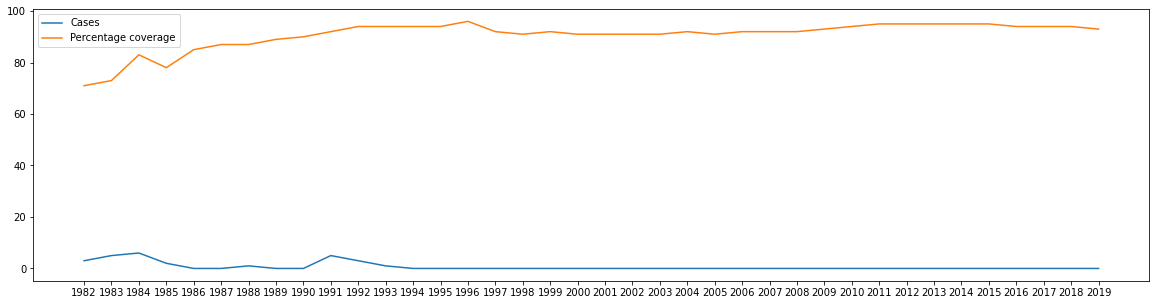

In [8]:
#As the years start from 2019 and go backwards, we need to reverse the values
years = list(reversed(polio_uk.columns[4:-2]))
cases = list(reversed(polio_uk.to_numpy()[0][4:-2]))

#Just changing the size of the plot so it is easier to read
matplotlib.pyplot.rcParams["figure.figsize"] = (20,5)

#Plot the data. The years are on the X axis, the percentages on the Y one
matplotlib.pyplot.plot(years, cases, label = 'Cases')
matplotlib.pyplot.plot(years, vaccines_uk['percent_coverage'], label='Percentage coverage')
matplotlib.pyplot.legend()

***Recall your answer to the previous question. Did the polio cases behave as you expected?***
There were cases at the beginning, where the coverage was not as high, and then those cases decreased.


It is difficult in this plot to know if the vaccine did much for the United Kingdom in regards to stop polio. This is because vaccine coverage was quite high from the beginnig of our data, and cases were already low. We will now take a different country with more initial cases and lower coverage: Bangladesh. We will be doing the same process as we did with the United Kingdom.

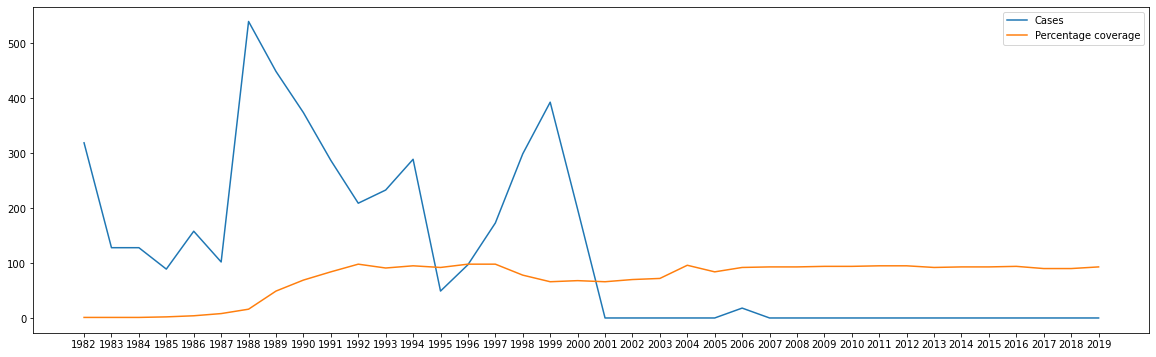

In [9]:
polio_bgl = polio.loc[polio['country']=='Bangladesh']
vaccines_bgl = vacc_polio.loc[vacc_polio['country']=='Bangladesh']


#As the years start from 2019 and go backwards, we need to reverse the values
years = list(reversed(polio_bgl.columns[4:-2]))
cases = list(reversed(polio_bgl.to_numpy()[0][4:-2]))

#Just changing the size of the plot so it is easier to read
matplotlib.pyplot.rcParams["figure.figsize"] = (20,6)

#Plot the data. The years are on the X axis, the percentages on the Y one
matplotlib.pyplot.plot(years, cases, label='Cases')
matplotlib.pyplot.plot(years, vaccines_bgl['percent_coverage'], label= 'Percentage coverage')
matplotlib.pyplot.legend()

***Is the effect of the vaccine visible in this case? Are you able to see a decrease of cases with the increase of the vaccine?***

Yes, it is possible to see that the cases decreased when the vaccine was being used more.

Finally, we will look at worldwide data. As we have the data for each country, we need to calculate the global, so there is some processing to be done first. You do not need to understand the code of the processing, just know that we are adding all the cases in each year and then doing an average of the percentage of vaccination for each year over all the countries.

In [10]:
years = list(range(1980,2020))
percentages = [] #List to store the average percentage coverage for each year
cases = [] #List to store the number of cases in total for each year
#For each of the years, go through the data of that year
for year in years:
    #Get the data in polio cases for that year and add them taking NaN values as 0
    polio_cases = numpy.nansum(polio[str(year)])
    
    #Get the percentage coverage for all the countries
    coverage = vaccines.loc[vaccines['year']==year]
    #Calculate the percentage. Add all up and divide by the number of non-NaN values
    avg = numpy.nansum(coverage['percent_coverage'])/numpy.count_nonzero(~numpy.isnan(coverage['percent_coverage']))
    
    #Add the results to the corresponding variables
    percentages.append(avg)
    cases.append(polio_cases)
    
#Create a dataframe with the data we have extracted
global_data = pandas.DataFrame({'year':years, 'percentage_cov':percentages, 'cases':cases})

In [11]:
#Look at the data we have created from the previous one
global_data

,year,percentage_cov,cases
0,1980,46.038071,52630.0
1,1981,48.500963,65737.0
2,1982,50.197065,51628.0
3,1983,54.637736,39973.0
4,1984,54.693913,35084.0
5,1985,56.766556,38483.0
6,1986,60.615975,32846.0
7,1987,64.051799,39683.0
8,1988,67.672727,34617.0
9,1989,70.582069,26104.0


As you can see from the previous table, we now have the global data we needed. As the number of polio cases is quite high in the earlier years, we will plot the percentage coverage and the cases in different scales ,but keeping them in the same plot for it to be easier to read. In the plot, the scale of the cases is to the left, and the scale of the percentage coverage is to the right.

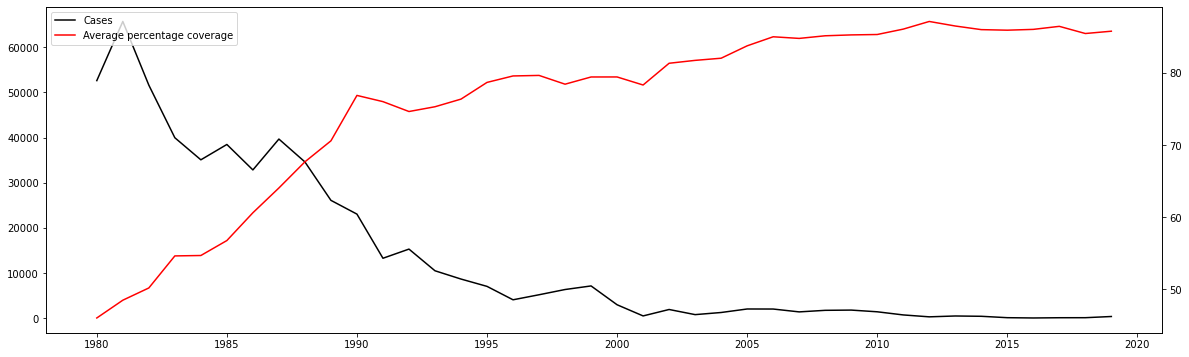

In [12]:
fig, ax_left = matplotlib.pyplot.subplots()
ax_right = ax_left.twinx()
#Plot the cases
plt1, = ax_left.plot(global_data['year'], global_data['cases'], label='Cases', color='black')
#Plot the percentage coverage
plt2, = ax_right.plot(global_data['year'], global_data['percentage_cov'], label='Percentage coverage', color='red')
matplotlib.pyplot.legend([plt1,plt2],["Cases", "Average percentage coverage"])
matplotlib.pyplot.show()

***Is it clear by the plot if the polio cases decreased with the increase of the coverage of the vaccine?***

It is clear from this plot that, as the coverage increases, the number of cases has decreased.

We can also compute the correlation coefficient between the global cases and the average percentage coverage. Remember that the correlation coefficient measures the relationship between two variables. The value of this coefficient is between -1 and 1, being 0 no relationship at all. A positive value means that both variables increase together, and a negative value means that one increases while the other decreases. The closer the coefficient is to 1 or -1, the stronger the correlation is. 

***Knowing this, do you expect the correlation coefficient to be positive or negative? Why?***
The coefficient is expected to be negative, because we have seen that the cases decrease as coverage increases.

To calculate the correlation coefficient, we will use the NumPy function [corrcoef()](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html). This gives us a a matrix of coefficients, so we need to extract the coefficient between the two variables we feed into it.

In [13]:
numpy.corrcoef(global_data['percentage_cov'], global_data['cases'])[0][1]

-0.9646409089929149

***Does the value have the sign you expected it to have? Do you think the variables are strongly correlated?*** 

The coefficient is negative. The values are very strongly correlated, the coefficient is very close to -1. 

 We have seen here that vaccines do help in preventing diseases. Nowadays, polio is almost extinct and the World Health Organisation believes it is possible to eradicate it if we keep the usage of vaccines. Unfortunately, movements like anti-vaxxers are causing [some diseases to come back](https://eu.usatoday.com/story/news/health/2019/03/28/anti-vaxxers-open-door-measles-mumps-old-time-diseases/3295390002/) in countries where they were considered extinct.